## Project: Development of a reduced pediatric injury prediction model
Created by: Thomas Hartka, MD, MS  
Date created: 12/20/20  
  
This notebook plots the posterior probability for each variable based on the Bayesian model averaging.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

## Read data and combine

In [2]:
# read in data
var_prob = pd.read_csv("../Results/Var_prob_10x-ext_pred-ISS.csv")
var_prob_til = pd.read_csv("../Results/Var_prob_10x-ext_pred-TIL.csv")

# rename ISS results
var_prob = var_prob.rename(columns={'post_prob':'ISS>=16'})

# combine data
var_prob['Target injury list'] = var_prob_til.post_prob

# set variable to index
var_prob = var_prob.set_index('variable')

## Rename variables for Plot

In [3]:
var_prob = var_prob.rename(index={'age_10_14': 'Age: 10-14', 
                     'pdof_farside': 'PDOF-Farside',
                     'sex':'Sex-Female',
                     'age_5_9':'Age: 5-9',
                     'front_row':'Seating-Front row',
                     'pdof_rear':'PDOF-Rear',
                     'age_15_18':'Age: 15-18',
                     'rolled':'Rollover',
                     'prop_restraint':'Optimal restraint use',
                     'multicoll':'Multiple collisions',
                     'pdof_nearside':'PDOF-Nearside',
                     'any_restraint':'Any restraint use',
                     'dvtotal':'Delta-V total',
                     'ejection':'Ejection',
                     'entrapment':'Entrapment',
                     'splimit':'Posted speed limit',
                     'abdeply':'Any airbag deplyoment'})

## Plot results

In [4]:
# reverse order of variables
var_prob = var_prob.sort_values(by='ISS>=16',ascending=True)

In [5]:
var_prob

,ISS>=16,Target injury list
variable,,
Age: 10-14,0.057487,0.057425
Sex-Female,0.057501,0.057462
PDOF-Rear,0.057505,0.057511
PDOF-Farside,0.057519,0.057534
Age: 5-9,0.057577,0.057562
Seating-Front row,0.057618,0.057689
Any airbag deplyoment,0.057746,0.057782
Age: 15-18,0.057827,0.057921
Posted speed limit,0.057908,0.057970


Text(0.5,0,'Posterior probability ')

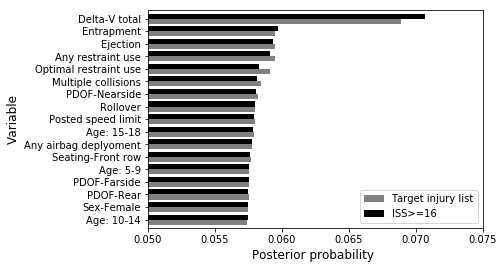

In [6]:
# set up plot
#fig, ax = plt.subplots()

# add data to horizontal var plot
fig = var_prob[['Target injury list','ISS>=16']].plot(kind='barh',color=['grey','black'], width=0.8)

# set limits
plt.xlim(0.05, 0.075)

# format y-axis ticks
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# add labels
plt.ylabel('Variable',size=12)
plt.xlabel('Posterior probability ',size=12)

#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text yticklabel objects>)

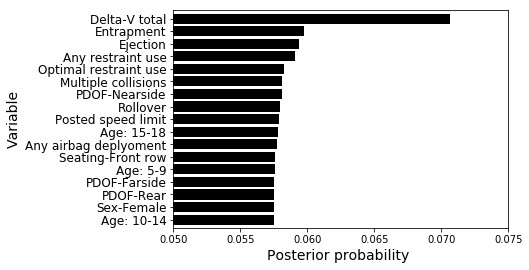

In [7]:
# add data to horizontal var plot
fig = var_prob['ISS>=16'].plot(kind='barh',color=['black'], width=0.8)

# set limits
plt.xlim(0.05, 0.075)

# format y-axis ticks
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# add labels
plt.ylabel('Variable',size=14)
plt.xlabel('Posterior probability ',size=14)
plt.yticks(fontsize=12)